In [69]:
import pandas as pd
import os
from functools import reduce
import ast
import numpy as np
import matplotlib.pyplot as plt

In [3]:
folderpath = r"C:/Users/user/Desktop/MASTER/Imperial/BA_report/MyFitbitData/LoukiaConstantinou/user-site-export" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]

for path in filepaths:
    xl_name = path.split('C:/Users/user/Desktop/MASTER/Imperial/BA_report/MyFitbitData/LoukiaConstantinou/user-site-export')
    xl_name2 = xl_name[1].split('.')
    pd.read_json("{}".format(path)).to_excel("C:/Users/user/Desktop/MASTER/Imperial/BA_report/MyFitbitData/LoukiaConstantinou/excel/{}.xlsx".format(xl_name2[0]))

In [4]:
folderpath2 = r"C:/Users/user/Desktop/MASTER/Imperial/BA_report/MyFitbitData/LoukiaConstantinou/excel" # make sure to put the 'r' in front
filepaths2  = [os.path.join(folderpath2, name) for name in os.listdir(folderpath2)]

dictionary = {}  
for path in filepaths2:  
    key = os.path.basename(path).split('-')[0]
    group = dictionary.get(key,[])
    group.append(path)  
    dictionary[key] = group
    
for key in dictionary:
    excel_names = dictionary[key]
    # read them in
    excels = [pd.ExcelFile(name) for name in excel_names]
    # turn them into dataframes
    frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]
    # delete the first row for all frames except the first
    # i.e. remove the header row -- assumes it's the first
    frames[1:] = [df[1:] for df in frames[1:]]
    # concatenate them..
    combined = pd.concat(frames)
    # write it out
    combined.to_excel("combined_{}.xlsx".format(key), header=False, index=False)

In [5]:
sleep_score = pd.read_csv('C:/Users/user/Desktop/MASTER/Imperial/BA_report/MyFitbitData/LoukiaConstantinou/sleep-score/sleep_score.csv')

In [6]:
steps = pd.read_excel('combined_steps.xlsx')

In [7]:
calories = pd.read_excel('combined_calories.xlsx')

In [8]:
distance = pd.read_excel('combined_distance.xlsx')

In [9]:
heart_rate = pd.read_excel('combined_heart_rate.xlsx')

In [10]:
resting_heart_rate = pd.read_excel('combined_resting_heart_rate.xlsx')

In [11]:
sedentary_minutes = pd.read_excel('combined_sedentary_minutes.xlsx')
minutes_very_active = pd.read_excel('combined_very_active_minutes.xlsx')
minutes_moderately_active = pd.read_excel('combined_moderately_active_minutes.xlsx')
minutes_lightly_active = pd.read_excel('combined_lightly_active_minutes.xlsx')

In [12]:
data_frames = [sedentary_minutes, minutes_very_active, minutes_moderately_active, minutes_lightly_active]
activity = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [13]:
activity = activity.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [14]:
activity.columns = ['dateTime', 'sedentary_minutes', 'minutes_very_active', 'minutes_moderately_active', 'minutes_lightly_active']

In [15]:
activity.head()

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active
0,2019-12-24,1440,0,0,0
1,2019-12-25,1440,0,0,0
2,2019-12-26,1247,9,21,163
3,2019-12-27,724,0,0,218
4,2019-12-28,681,0,0,472


In [16]:
steps = steps.groupby(steps.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Steps')

In [17]:
calories = calories.groupby(calories.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Calories')

In [18]:
distance = distance.groupby(distance.dateTime.dt.date, sort=False)['value'].sum().reset_index(name ='Total_Distance')

In [19]:
sleep_score = sleep_score[['timestamp', 'overall_score']]

In [20]:
steps.head()

,dateTime,Total_Steps
0,2019-12-26,2750
1,2019-12-27,2990
2,2019-12-28,11244
3,2019-12-29,6827
4,2019-12-30,6872


In [21]:
calories.head()

,dateTime,Total_Calories
0,2019-12-24,1267.20
1,2019-12-25,1267.20
2,2019-12-26,1775.16
3,2019-12-27,1766.70
4,2019-12-28,2357.48


In [22]:
distance.head()

,dateTime,Total_Distance
0,2019-12-26,183440
1,2019-12-27,199330
2,2019-12-28,750220
3,2019-12-29,457790
4,2019-12-30,462110


In [23]:
sleep_score.head()

,timestamp,overall_score
0,2020-07-15T09:51:00Z,76
1,2020-07-14T10:15:00Z,88
2,2020-07-13T10:19:30Z,85
3,2020-07-12T12:29:00Z,72
4,2020-07-11T12:23:00Z,75


In [24]:
resting_heart_rate.head()

,Unnamed: 0,dateTime,value
0,0,2019-12-24,"{'date': None, 'value': 0.0, 'error': 0.0}"
1,1,2019-12-25,"{'date': None, 'value': 0.0, 'error': 0.0}"
2,2,2019-12-26,"{'date': None, 'value': 0.0, 'error': 0.0}"
3,3,2019-12-27,"{'date': '12/27/19', 'value': 77.9944286346435..."
4,4,2019-12-28,"{'date': '12/28/19', 'value': 80.7142028808593..."


In [25]:
#type(resting_heart_rate['value'][0])
resting_heart_rate['dict_value'] = ""
resting_heart_rate['resting_heart_rate'] = ""
for i in range(len(resting_heart_rate)):
    resting_heart_rate['dict_value'][i] = ast.literal_eval(resting_heart_rate['value'][i])
    for key in resting_heart_rate['dict_value'][i]:
        resting_heart_rate['resting_heart_rate'][i] = resting_heart_rate['dict_value'][i]['value']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
resting_heart_rate = resting_heart_rate[['dateTime', 'resting_heart_rate']]

In [27]:
resting_heart_rate.head()

,dateTime,resting_heart_rate
0,2019-12-24,0
1,2019-12-25,0
2,2019-12-26,0
3,2019-12-27,77.9944
4,2019-12-28,80.7142


In [28]:
sleep_score['dateTime'] = pd.to_datetime(sleep_score['timestamp'])

In [29]:
sleep_score['dateTime'] = sleep_score['dateTime'].dt.date

In [30]:
sleep_score = sleep_score.drop(['timestamp'], axis = 1)

In [31]:
sleep_score.head()

,overall_score,dateTime
0,76,2020-07-15
1,88,2020-07-14
2,85,2020-07-13
3,72,2020-07-12
4,75,2020-07-11


In [32]:
sleep_score['dateTime'] = pd.to_datetime(sleep_score['dateTime'])

In [33]:
steps['dateTime'] = pd.to_datetime(steps['dateTime'])

In [34]:
calories['dateTime'] = pd.to_datetime(calories['dateTime'])

In [35]:
distance['dateTime'] = pd.to_datetime(distance['dateTime'])

In [36]:
resting_heart_rate['dateTime'] = pd.to_datetime(resting_heart_rate['dateTime'])

In [37]:
data_frames = [activity, steps, calories, distance, sleep_score, resting_heart_rate]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [38]:
final_df['day'] = final_df['dateTime'].dt.day_name()

In [39]:
final_df['is_weekend'] = np.where((final_df.day == 'Saturday') | (final_df.day == 'Sunday'), 'Y', 'N')

In [40]:
final_df['success_steps'] = np.where(final_df.Total_Steps >= 10000, 'Y', 'N')

In [41]:
final_df

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,resting_heart_rate,day,is_weekend,success_steps
0,2019-12-24,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Tuesday,N,N
1,2019-12-25,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Wednesday,N,N
2,2019-12-26,1247.0,9.0,21.0,163.0,2750.0,1775.16,183440.0,NaN,0,Thursday,N,N
3,2019-12-27,724.0,0.0,0.0,218.0,2990.0,1766.70,199330.0,NaN,77.9944,Friday,N,N
4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,80.7142,Saturday,Y,Y
5,2019-12-29,611.0,57.0,36.0,322.0,6827.0,2443.50,457790.0,68.0,85.1195,Sunday,Y,N
6,2019-12-30,773.0,0.0,0.0,315.0,6872.0,1973.58,462110.0,77.0,82.0031,Monday,N,N
7,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y
8,2020-01-01,634.0,31.0,29.0,209.0,11011.0,2031.29,771550.0,74.0,80.6441,Wednesday,N,Y
9,2020-01-02,1269.0,45.0,27.0,99.0,10678.0,1839.50,768680.0,NaN,80.8336,Thursday,N,Y


In [42]:
sleep = pd.read_excel('combined_sleep.xlsx')

In [43]:
sleep.head()

,Unnamed: 0,dateOfSleep,duration,efficiency,endTime,infoCode,levels,logId,mainSleep,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed,type
0,0,2020-01-23,26640000,88,2020-01-23T08:43:30.000,0,"{'summary': {'deep': {'count': 2, 'minutes': 5...",25563222565,True,1,386,58,0,2020-01-23T01:19:00.000,444,stages
1,1,2020-01-22,31140000,95,2020-01-22T09:27:30.000,0,"{'summary': {'deep': {'count': 3, 'minutes': 6...",25550387256,True,1,436,83,0,2020-01-22T00:48:30.000,519,stages
2,2,2020-01-20,31140000,98,2020-01-20T09:59:00.000,0,"{'summary': {'deep': {'count': 4, 'minutes': 8...",25521550717,True,0,476,43,0,2020-01-20T01:20:00.000,519,stages
3,3,2020-01-19,21900000,97,2020-01-19T09:34:00.000,0,"{'summary': {'deep': {'count': 2, 'minutes': 2...",25506653528,True,7,303,62,0,2020-01-19T03:28:30.000,365,stages
4,4,2020-01-18,17340000,97,2020-01-18T06:17:30.000,0,"{'summary': {'deep': {'count': 2, 'minutes': 2...",25491539462,True,0,249,40,0,2020-01-18T01:28:00.000,289,stages


In [44]:
sleep['dict_levels'] = ""
sleep['deep'] = ""
sleep['wake'] = ""
sleep['light'] = ""
sleep['rem'] = ""
sleep['restless'] = ""
sleep['awake'] = ""
sleep['asleep'] = ""
for i in range(len(sleep)):
    sleep['dict_levels'][i] = ast.literal_eval(sleep['levels'][i])
    for key in sleep['dict_levels'][i]['summary']:
        sleep[key][i] = sleep['dict_levels'][i]['summary'][key]['minutes']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [45]:
sleep = sleep[['dateOfSleep', 'deep', 'wake', 'light', 'rem', 'restless', 'awake', 'asleep']]

In [46]:
sleep = sleep.rename(columns={"dateOfSleep": "dateTime"})

In [47]:
sleep['dateTime'] = pd.to_datetime(sleep['dateTime'])

In [48]:
sleep.dtypes

dateTime    datetime64[ns]
deep                object
wake                object
light               object
rem                 object
restless            object
awake               object
asleep              object
dtype: object

In [49]:
sleep.head()

,dateTime,deep,wake,light,rem,restless,awake,asleep
0,2020-01-23,52,58,246,88,,,
1,2020-01-22,60,83,265,111,,,
2,2020-01-20,85,43,243,148,,,
3,2020-01-19,20,62,219,64,,,
4,2020-01-18,21,40,177,51,,,


In [50]:
data_frames = [final_df, sleep]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

In [51]:
final_df.columns

Index(['dateTime', 'sedentary_minutes', 'minutes_very_active',
       'minutes_moderately_active', 'minutes_lightly_active', 'Total_Steps',
       'Total_Calories', 'Total_Distance', 'overall_score',
       'resting_heart_rate', 'day', 'is_weekend', 'success_steps', 'deep',
       'wake', 'light', 'rem', 'restless', 'awake', 'asleep'],
      dtype='object')

In [52]:
final_df.head()

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,resting_heart_rate,day,is_weekend,success_steps,deep,wake,light,rem,restless,awake,asleep
0,2019-12-24,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Tuesday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-25,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Wednesday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-26,1247.0,9.0,21.0,163.0,2750.0,1775.16,183440.0,NaN,0,Thursday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-27,724.0,0.0,0.0,218.0,2990.0,1766.70,199330.0,NaN,77.9944,Friday,N,N,112,48,198,140,,,
4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,80.7142,Saturday,Y,Y,42,26,153,66,,,


In [53]:
new_df = final_df.dropna()

In [54]:
new_df

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,resting_heart_rate,day,is_weekend,success_steps,deep,wake,light,rem,restless,awake,asleep
4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,80.7142,Saturday,Y,Y,42,26,153,66,,,
5,2019-12-29,611.0,57.0,36.0,322.0,6827.0,2443.50,457790.0,68.0,85.1195,Sunday,Y,N,55,50,211,98,,,
6,2019-12-30,773.0,0.0,0.0,315.0,6872.0,1973.58,462110.0,77.0,82.0031,Monday,N,N,64,34,165,89,,,
7,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,76,44,253,120,,,
8,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,,,,,11,1,56
9,2020-01-01,634.0,31.0,29.0,209.0,11011.0,2031.29,771550.0,74.0,80.6441,Wednesday,N,Y,53,58,282,144,,,
13,2020-01-05,570.0,14.0,6.0,186.0,6988.0,1815.84,475730.0,89.0,77.8145,Sunday,Y,N,74,69,330,191,,,
14,2020-01-06,795.0,35.0,9.0,134.0,9980.0,1826.58,766460.0,80.0,75.4155,Monday,N,N,70,58,237,102,,,
15,2020-01-07,727.0,24.0,29.0,158.0,7864.0,1830.21,559530.0,83.0,73.3841,Tuesday,N,N,76,51,250,125,,,
16,2020-01-08,714.0,10.0,15.0,204.0,7278.0,1888.75,515880.0,79.0,71.9089,Wednesday,N,N,79,61,275,82,,,


In [55]:
len(new_df)

118

In [56]:
final_df

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,resting_heart_rate,day,is_weekend,success_steps,deep,wake,light,rem,restless,awake,asleep
0,2019-12-24,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Tuesday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-25,1440.0,0.0,0.0,0.0,NaN,1267.20,NaN,NaN,0,Wednesday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-26,1247.0,9.0,21.0,163.0,2750.0,1775.16,183440.0,NaN,0,Thursday,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-27,724.0,0.0,0.0,218.0,2990.0,1766.70,199330.0,NaN,77.9944,Friday,N,N,112,48,198,140,,,
4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,80.7142,Saturday,Y,Y,42,26,153,66,,,
5,2019-12-29,611.0,57.0,36.0,322.0,6827.0,2443.50,457790.0,68.0,85.1195,Sunday,Y,N,55,50,211,98,,,
6,2019-12-30,773.0,0.0,0.0,315.0,6872.0,1973.58,462110.0,77.0,82.0031,Monday,N,N,64,34,165,89,,,
7,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,76,44,253,120,,,
8,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,,,,,11,1,56
9,2020-01-01,634.0,31.0,29.0,209.0,11011.0,2031.29,771550.0,74.0,80.6441,Wednesday,N,Y,53,58,282,144,,,


In [57]:
final_df.to_csv(r"C:/Users/user/Desktop/MASTER/Imperial/BA_report/final_df.csv", index = False)

In [58]:
new_df.columns

Index(['dateTime', 'sedentary_minutes', 'minutes_very_active',
       'minutes_moderately_active', 'minutes_lightly_active', 'Total_Steps',
       'Total_Calories', 'Total_Distance', 'overall_score',
       'resting_heart_rate', 'day', 'is_weekend', 'success_steps', 'deep',
       'wake', 'light', 'rem', 'restless', 'awake', 'asleep'],
      dtype='object')

In [59]:
new_df.head()

,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,resting_heart_rate,day,is_weekend,success_steps,deep,wake,light,rem,restless,awake,asleep
4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,80.7142,Saturday,Y,Y,42,26,153,66,,,
5,2019-12-29,611.0,57.0,36.0,322.0,6827.0,2443.50,457790.0,68.0,85.1195,Sunday,Y,N,55,50,211,98,,,
6,2019-12-30,773.0,0.0,0.0,315.0,6872.0,1973.58,462110.0,77.0,82.0031,Monday,N,N,64,34,165,89,,,
7,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,76,44,253,120,,,
8,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,79.2224,Tuesday,N,Y,,,,,11,1,56


In [60]:
week_sed = new_df.groupby([new_df['dateTime'].dt.strftime('%W')])['sedentary_minutes'].mean()

In [63]:
new_df['resting_heart_rate'] = new_df['resting_heart_rate'].apply(pd.to_numeric, downcast='float', errors='coerce')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
week_rest_heart_rate = new_df.groupby([new_df['dateTime'].dt.strftime('%W')])['resting_heart_rate'].mean()

In [66]:
data_frames = [week_sed, week_rest_heart_rate]
week_df = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

Text(0, 0.5, 'resting_heart_rate')

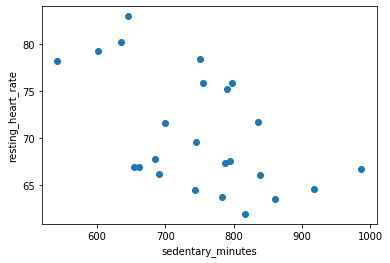

In [70]:
plt.scatter(week_df['sedentary_minutes'], week_df['resting_heart_rate'])
plt.xlabel('sedentary_minutes')
plt.ylabel('resting_heart_rate')

In [71]:
week_very_active = new_df.groupby([new_df['dateTime'].dt.strftime('%W')])['minutes_very_active'].mean()

In [72]:
data_frames = [week_very_active, week_rest_heart_rate]
week_df2 = reduce(lambda  left,right: pd.merge(left,right,on=['dateTime'],
                                            how='outer'), data_frames)

Text(0, 0.5, 'resting_heart_rate')

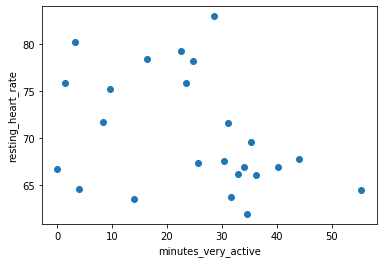

In [73]:
plt.scatter(week_df2['minutes_very_active'], week_df2['resting_heart_rate'])
plt.xlabel('minutes_very_active')
plt.ylabel('resting_heart_rate')

## EDA

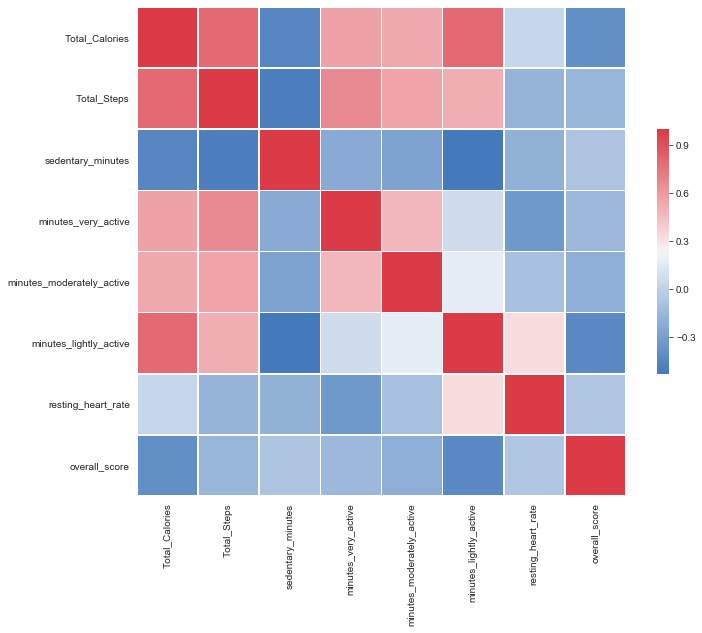

In [74]:
corrdf_calories = new_df[['Total_Calories','Total_Steps', 'is_weekend', 'sedentary_minutes', 'minutes_very_active', 
                            'minutes_moderately_active', 'minutes_lightly_active', 'resting_heart_rate', 'overall_score']]

import seaborn as sns
import matplotlib.pyplot as plt
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corrdf_calories, dropDuplicates = False)

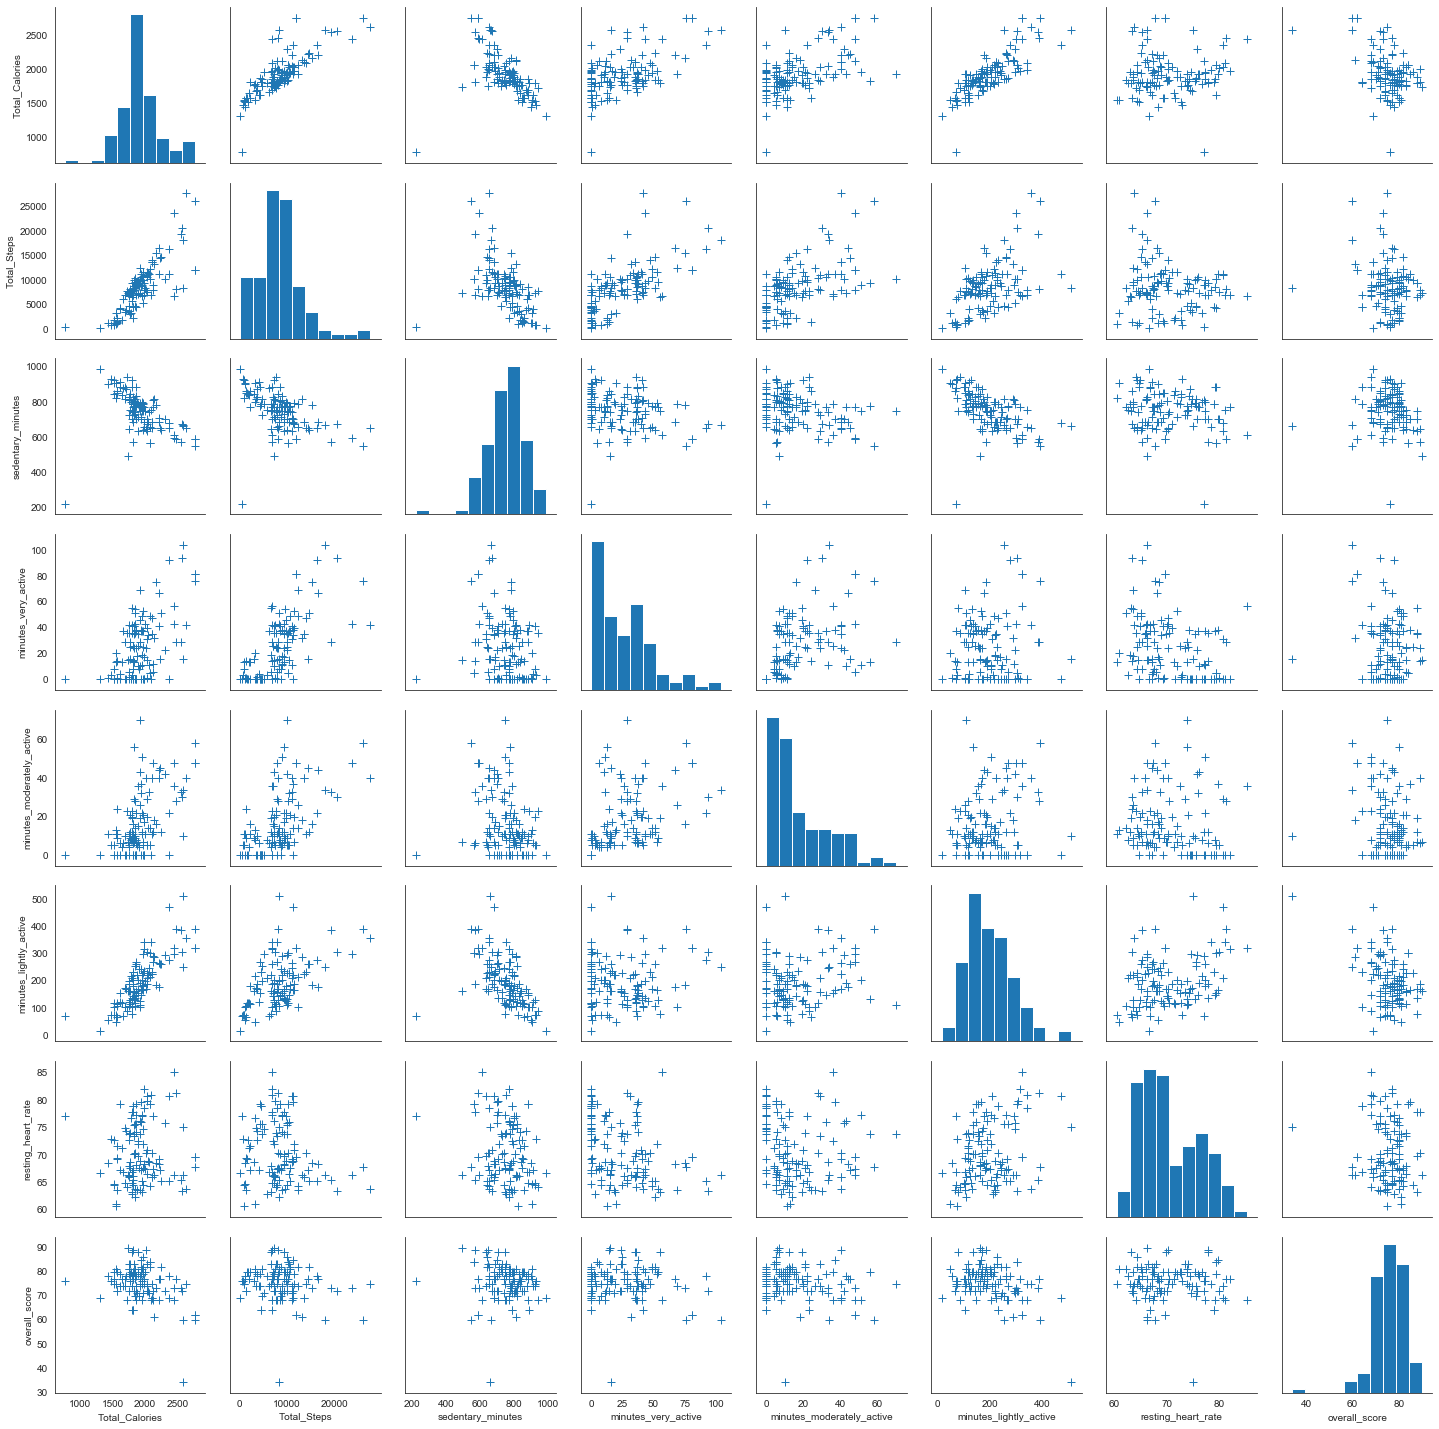

In [75]:
sns.pairplot(corrdf_calories.dropna(), kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

Text(0, 0.5, 'Minutes Sedentary')

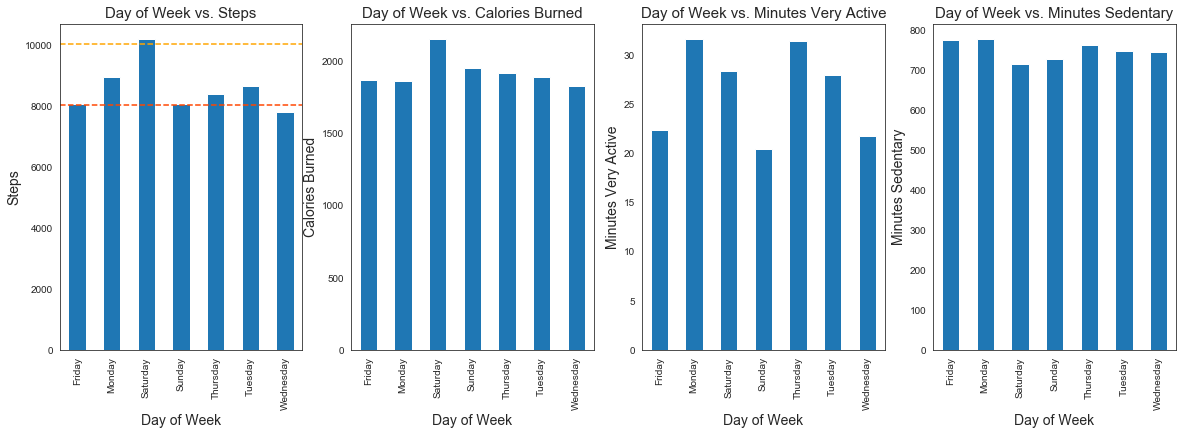

In [76]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(141)  
new_df.groupby('day').Total_Steps.mean().plot.bar()
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')

ax2 = fig.add_subplot(142)
new_df.groupby('day').Total_Calories.mean().plot.bar()
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)

ax3 = fig.add_subplot(143)
new_df.groupby('day').minutes_very_active.mean().plot.bar()
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)

ax4 = fig.add_subplot(144)
new_df.groupby('day').sedentary_minutes.mean().plot.bar()
plt.title('Day of Week vs. Minutes Sedentary', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Sedentary', fontsize=14)

Text(0, 0.5, 'Resting Heart Rate')

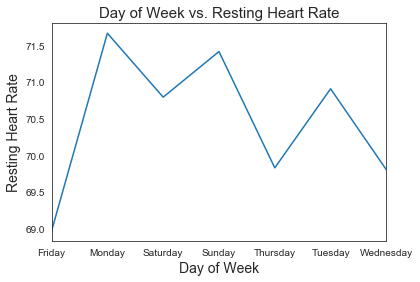

In [77]:
new_df.groupby('day').resting_heart_rate.mean().plot.line()
plt.title('Day of Week vs. Resting Heart Rate', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Resting Heart Rate', fontsize=14)

In [78]:
new_df['minutes_asleep'] = new_df['deep'] + new_df['wake'] + new_df['light'] + new_df['rem']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
new_df = new_df.replace("", 0)

In [80]:
new_df = new_df.reset_index()

In [81]:
for i in range(len(new_df)):
    if new_df['minutes_asleep'][i] == 0:
        new_df['minutes_asleep'][i] = new_df['asleep'][i]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
new_df.head()

,index,dateTime,sedentary_minutes,minutes_very_active,minutes_moderately_active,minutes_lightly_active,Total_Steps,Total_Calories,Total_Distance,overall_score,...,is_weekend,success_steps,deep,wake,light,rem,restless,awake,asleep,minutes_asleep
0,4,2019-12-28,681.0,0.0,0.0,472.0,11244.0,2357.48,750220.0,69.0,...,Y,Y,42,26,153,66,0,0,0,287
1,5,2019-12-29,611.0,57.0,36.0,322.0,6827.0,2443.50,457790.0,68.0,...,Y,N,55,50,211,98,0,0,0,414
2,6,2019-12-30,773.0,0.0,0.0,315.0,6872.0,1973.58,462110.0,77.0,...,N,N,64,34,165,89,0,0,0,352
3,7,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,...,N,Y,76,44,253,120,0,0,0,493
4,8,2019-12-31,566.0,5.0,5.0,303.0,10241.0,2067.51,783240.0,84.0,...,N,Y,0,0,0,0,11,1,56,56


In [83]:
row = ((new_df.loc[new_df['deep'] == 0]))

In [84]:
sleep_perc_df = new_df[~new_df.index.isin(row.index)]

In [85]:
sleep_perc_df['deep_perc'] = sleep_perc_df['deep']/sleep_perc_df['minutes_asleep']
sleep_perc_df['wake_perc'] = sleep_perc_df['wake']/sleep_perc_df['minutes_asleep']
sleep_perc_df['light_perc'] = sleep_perc_df['light']/sleep_perc_df['minutes_asleep']
sleep_perc_df['rem_perc'] = sleep_perc_df['rem']/sleep_perc_df['minutes_asleep']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

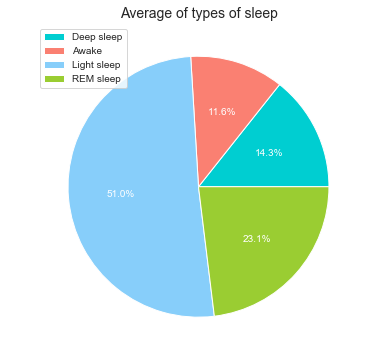

In [86]:
avg_perc_sleep = sleep_perc_df[['deep_perc', 'wake_perc', 'light_perc', 'rem_perc']].mean()

fig = plt.figure(figsize = (6,6))
labels=['Deep sleep', 'Awake', 'Light sleep', 'REM sleep']
plt.pie(avg_perc_sleep, colors = ['darkturquoise', 'salmon', 'lightskyblue', 'yellowgreen'], autopct='%1.1f%%', labels=labels, textprops=dict(color="w"))

# #carve the donut
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

plt.title('Average of types of sleep', fontsize=14)
plt.legend()
plt.show()

In [87]:
avg_perc_sleep

deep_perc     0.143228
wake_perc     0.116303
light_perc    0.509876
rem_perc      0.230593
dtype: float64

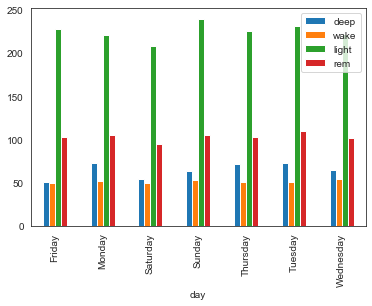

In [88]:
sleep_perc_df.groupby('day').mean()[["deep", "wake", "light", "rem"]].plot(kind='bar')

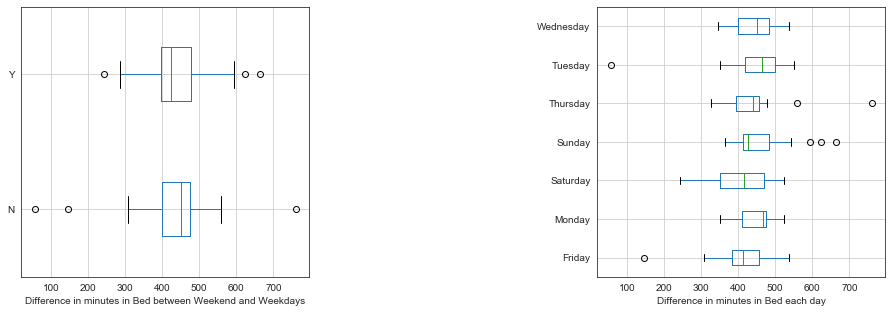

In [89]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121)
new_df.boxplot(column = 'minutes_asleep', by = 'is_weekend', vert = False, widths = 0.4, ax=ax)
plt.xlabel('Difference in minutes in Bed between Weekend and Weekdays')
plt.suptitle('')
plt.title('');

ax2 = f.add_subplot(122)
new_df.boxplot(column = 'minutes_asleep', by = 'day', vert = False, widths = 0.4, ax=ax2)
plt.xlabel('Difference in minutes in Bed each day')
plt.suptitle('')
plt.title('');

plt.subplots_adjust(wspace = 1)

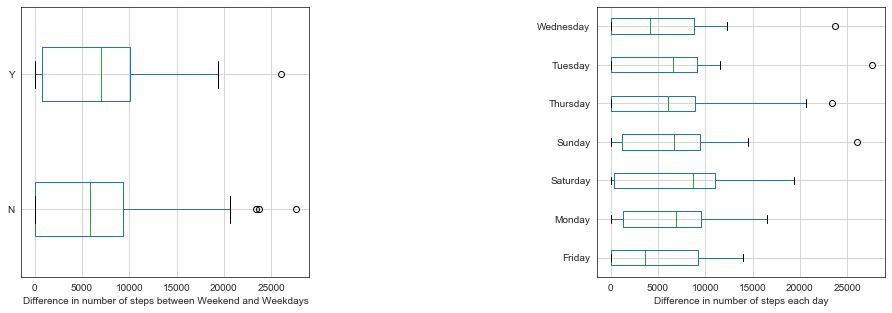

In [90]:
f = plt.figure(figsize=(15,5))

ax = f.add_subplot(121) 
final_df.boxplot(column = 'Total_Steps', by = 'is_weekend', vert = False, widths = 0.4, ax=ax)
plt.xlabel('Difference in number of steps between Weekend and Weekdays')
plt.suptitle('')
plt.title('');

ax2 = f.add_subplot(122) 
final_df.boxplot(column = 'Total_Steps', by = 'day', vert = False, widths = 0.4, ax=ax2)
plt.xlabel('Difference in number of steps each day')
plt.suptitle('')
plt.title('');

plt.subplots_adjust(wspace = 1)

## Machine Learning

In [91]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [92]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
new_df['day_num'] = number.fit_transform(new_df['day'].astype("str"))

In [93]:
X = new_df[['day_num', 'Total_Steps', 'sedentary_minutes', 'minutes_lightly_active', 'minutes_moderately_active', 
            'minutes_very_active', 'overall_score', 'resting_heart_rate']]
X.fillna(X.mean(), inplace=True)

threshold = 2000

Y = new_df['Total_Calories'] > threshold
#Y = final_df['success']

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)
print('X_train shape: {}. X_test shape: {}'.format(x_train.shape, x_test.shape))

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


X shape: (118, 8)
Y shape: (118,)
X_train shape: (82, 8). X_test shape: (36, 8)


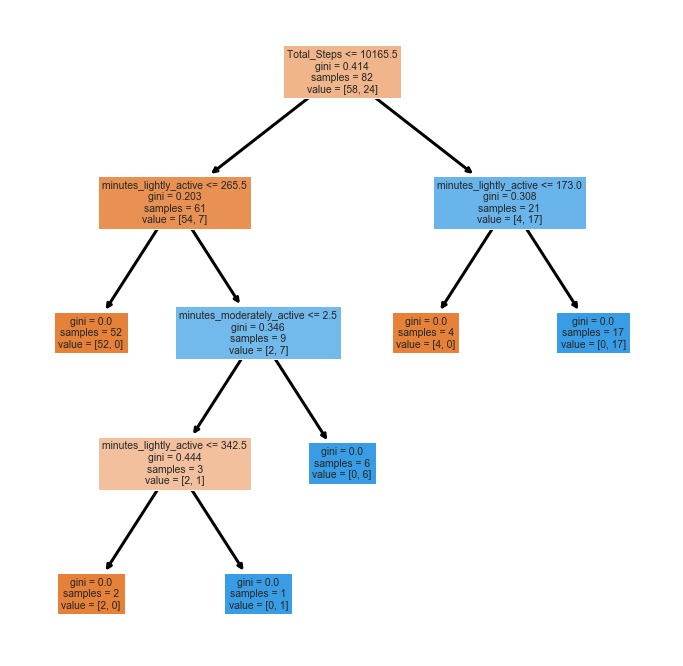

In [94]:
clf_final = tree.DecisionTreeClassifier(random_state=42)
clf_final.fit(x_train, y_train)
y_pred = clf_final.predict(x_test)
fig, ax = plt.subplots(figsize=(12, 12))
out = tree.plot_tree(clf_final, feature_names=list(x_train), filled = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
plt.show()

In [95]:
from sklearn.tree.export import export_text
tree_rules = export_text(clf_final, feature_names=list(x_train))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [96]:
tree_rules

'|--- Total_Steps <= 10165.50\n|   |--- minutes_lightly_active <= 265.50\n|   |   |--- class: False\n|   |--- minutes_lightly_active >  265.50\n|   |   |--- minutes_moderately_active <= 2.50\n|   |   |   |--- minutes_lightly_active <= 342.50\n|   |   |   |   |--- class: False\n|   |   |   |--- minutes_lightly_active >  342.50\n|   |   |   |   |--- class: True\n|   |   |--- minutes_moderately_active >  2.50\n|   |   |   |--- class: True\n|--- Total_Steps >  10165.50\n|   |--- minutes_lightly_active <= 173.00\n|   |   |--- class: False\n|   |--- minutes_lightly_active >  173.00\n|   |   |--- class: True\n'

In [97]:
train_accuracy = clf_final.score(x_train, y_train) 
val_accuracy = clf_final.score(x_test, y_test) 
[train_accuracy,val_accuracy]

[1.0, 0.9444444444444444]

In [98]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [100]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

59
30
29


In [101]:
train_accuracy_dict = dict()
val_accuracy_dict = dict()
val_recall_dict = dict()
val_precision_dict= dict()

for i in range (1,53):
    clfi = tree.DecisionTreeClassifier(random_state=42, max_depth = i)
    clfi = clfi.fit(x_train, y_train) 
    train_accuracy_dict[i] = clfi.score(x_train, y_train)
    val_predict = clfi.predict(x_val)
    val_accuracy_dict[i] = clfi.score(x_val, y_val)
    val_recall_dict[i] = recall_score(val_predict, y_val)
    val_precision_dict[i] = precision_score(val_predict, y_val)

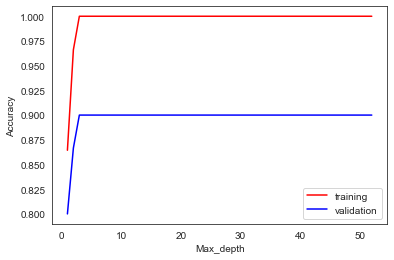

In [102]:
plt.plot(list(train_accuracy_dict.keys()), list(train_accuracy_dict.values()), color='red')
plt.plot(list(val_accuracy_dict.keys()), list(val_accuracy_dict.values()), color='blue')
plt.gca().legend(('training','validation'))
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

In [103]:
depth_optimal=max(val_accuracy_dict, key=val_accuracy_dict.get)
print(val_accuracy_dict[depth_optimal],depth_optimal)

0.9 3


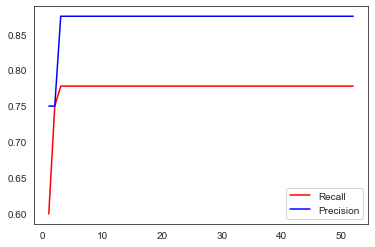

In [104]:
plt.plot(list(val_recall_dict.keys()), list(val_recall_dict.values()), color='red', label = 'Recall')
plt.plot(list(val_precision_dict.keys()), list(val_precision_dict.values()), color='blue', label = 'Precision')
plt.legend()

In [105]:
x_trainfull = x_train.append(x_val)
y_trainfull = y_train.append(y_val)

In [106]:
clf_full = tree.DecisionTreeClassifier(random_state=42, max_depth=depth_optimal)
clf_full = clf_full.fit(x_trainfull, y_trainfull)
trainfull_accuracy = clf_full.score(x_trainfull, y_trainfull) 
testfull_accuracy = clf_full.score(x_test, y_test) 
[trainfull_accuracy, testfull_accuracy]

[0.9887640449438202, 0.9310344827586207]

0.875


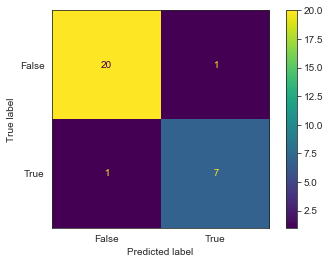

In [107]:
from sklearn.metrics import plot_confusion_matrix

print(recall_score(clf_full.predict(x_test), y_test))
plot_confusion_matrix(clf_full, x_test, y_test, values_format='2g')

[Text(193.15384615384616, 190.26, 'Total_Steps <= 10092.5\ngini = 0.424\nsamples = 118\nvalue = [82, 36]\nclass = No'),
 Text(103.01538461538462, 135.9, 'minutes_lightly_active <= 265.5\ngini = 0.174\nsamples = 83\nvalue = [75, 8]\nclass = No'),
 Text(51.50769230769231, 81.53999999999999, 'overall_score <= 88.5\ngini = 0.027\nsamples = 72\nvalue = [71, 1]\nclass = No'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]\nclass = No'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = No'),
 Text(154.52307692307693, 81.53999999999999, 'minutes_very_active <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Yes'),
 Text(283.2923076923077, 135.9, 'minutes_lightly_active <= 184.5\ngini = 0.32\nsa

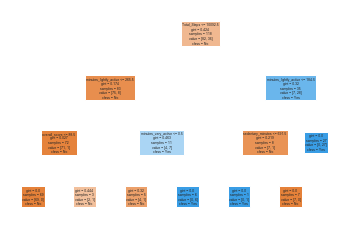

In [108]:
clf_final = tree.DecisionTreeClassifier(random_state=42, max_depth=depth_optimal)
clf_final.fit(X, Y)
tree.plot_tree(clf_final, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)

In [109]:
from sklearn.tree.export import export_text
r=export_text(clf_final, feature_names=list(X.columns))
print(r)

|--- Total_Steps <= 10092.50
|   |--- minutes_lightly_active <= 265.50
|   |   |--- overall_score <= 88.50
|   |   |   |--- class: False
|   |   |--- overall_score >  88.50
|   |   |   |--- class: False
|   |--- minutes_lightly_active >  265.50
|   |   |--- minutes_very_active <= 0.50
|   |   |   |--- class: False
|   |   |--- minutes_very_active >  0.50
|   |   |   |--- class: True
|--- Total_Steps >  10092.50
|   |--- minutes_lightly_active <= 184.50
|   |   |--- sedentary_minutes <= 691.50
|   |   |   |--- class: True
|   |   |--- sedentary_minutes >  691.50
|   |   |   |--- class: False
|   |--- minutes_lightly_active >  184.50
|   |   |--- class: True



In [110]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
lr_y_pred = regr.predict(x_test)
                        
print("Mean squared error: %.2f"% mean_squared_error(y_test, lr_y_pred))
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
print(coefficients)
print("r2_error: %.2f"% r2_score(y_test, lr_y_pred))

Mean squared error: 0.11
                           0         0
0                    day_num  0.001704
1                Total_Steps  0.000004
2          sedentary_minutes -0.000320
3     minutes_lightly_active  0.002886
4  minutes_moderately_active  0.006567
5        minutes_very_active  0.001849
6              overall_score -0.002207
7         resting_heart_rate -0.009017
r2_error: 0.44


In [111]:
y_train

27     False
19      True
94     False
103    False
25      True
8      False
13     False
83     False
3       True
17     False
38      True
91      True
6      False
76     False
101    False
93     False
54      True
50      True
108    False
46     False
80     False
61     False
114     True
79     False
115    False
41     False
58      True
48     False
100     True
57     False
75      True
32     False
110    False
59     False
63     False
98     False
37      True
29     False
104    False
1       True
52      True
21      True
2      False
23     False
99      True
87     False
113    False
74      True
86     False
82     False
117    False
20     False
60     False
71     False
106     True
14      True
92     False
51      True
102    False
Name: Total_Calories, dtype: bool

In [152]:
X = new_df[['day_num', 'Total_Steps', 'sedentary_minutes', 'minutes_lightly_active', 'minutes_moderately_active', 
            'minutes_very_active', 'overall_score', 'resting_heart_rate']]
X.fillna(X.mean(), inplace=True)

#threshold = 2000

#Y = new_df['Total_Calories'] > threshold
Y = new_df['success_steps']

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print('X_train shape: {}. X_test shape: {}'.format(x_train.shape, x_test.shape))

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


X shape: (118, 8)
Y shape: (118,)
X_train shape: (82, 8). X_test shape: (36, 8)


In [142]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [153]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [155]:
y_test = y_test.replace('Y',1)
y_test = y_test.replace('N',0)

In [156]:
y_test= 1 <= y_test
print(y_test)

56     False
89     False
4       True
45      True
26      True
116    False
69     False
10     False
90     False
73     False
18      True
111     True
11      True
96     False
42      True
31     False
88     False
0       True
97     False
109     True
64     False
40      True
95     False
53      True
44      True
12     False
15     False
70     False
107     True
24      True
66     False
22     False
36     False
55     False
81     False
30     False
Name: success_steps, dtype: bool


In [157]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [140]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: could not convert string to float: 'N'

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.95      0.98        22
           Y       0.93      1.00      0.97        14

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

